In [23]:
#Data.csv

**Step 1: Importing the libraries**

In [24]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import janitor
from matplotlib import pyplot as plt
from sklearn import metrics, linear_model, preprocessing, model_selection

%matplotlib inline

**Step 2: Importing dataset**

In [25]:
df = pd.read_csv('Data.csv')
df = janitor.clean_names(df)
df

,country,age,salary,purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [26]:
df.shape

(10, 4)

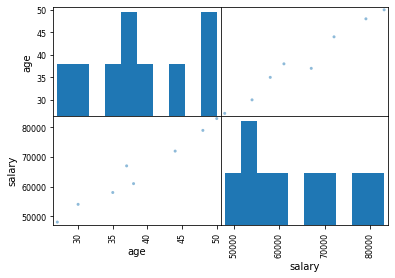

In [27]:
pd.plotting.scatter_matrix(df);

**Step 3: Handling the missing data**

In [28]:
df.isna().sum()

country      0
age          1
salary       1
purchased    0
dtype: int64

In [29]:
df.age.mean() # mean value of age

38.77777777777778

In [30]:
df['age'] = df.age.replace(np.nan, df.age.mean().round())

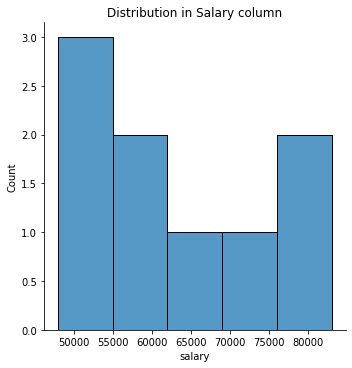

In [31]:
sns.displot(x='salary', data=df)
plt.title('Distribution in Salary column')
plt.show()

In [32]:
df.salary.mean() # Mean of salary

63777.77777777778

In [33]:
# replace missing value
df['salary'] = df.salary.replace(np.nan, df.salary.mean().round())

In [34]:
# data after treating missing values
df

,country,age,salary,purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63778.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,39.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


**Step 4: Encoding categorical data**

In [35]:
df['purchased'] = df.purchased.map({'No':0, 'Yes':1})

In [36]:
df

,country,age,salary,purchased
0,France,44.0,72000.0,0
1,Spain,27.0,48000.0,1
2,Germany,30.0,54000.0,0
3,Spain,38.0,61000.0,0
4,Germany,40.0,63778.0,1
5,France,35.0,58000.0,1
6,Spain,39.0,52000.0,0
7,France,48.0,79000.0,1
8,Germany,50.0,83000.0,0
9,France,37.0,67000.0,1


**Step 5: Creating a dummy variable**

In [37]:
country_df = pd.get_dummies(df.country)

In [38]:
df = pd.get_dummies(df, prefix=['country'])

In [39]:
df

,age,salary,purchased,country_France,country_Germany,country_Spain
0,44.0,72000.0,0,1,0,0
1,27.0,48000.0,1,0,0,1
2,30.0,54000.0,0,0,1,0
3,38.0,61000.0,0,0,0,1
4,40.0,63778.0,1,0,1,0
5,35.0,58000.0,1,1,0,0
6,39.0,52000.0,0,0,0,1
7,48.0,79000.0,1,1,0,0
8,50.0,83000.0,0,0,1,0
9,37.0,67000.0,1,1,0,0


**Step 6: Splitting the datasets into training sets and Test sets**

In [40]:
X, y = df.drop('purchased', axis=1), df[['purchased']]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, random_state=0, train_size=0.75)
X_train.shape, X_test.shape

((7, 5), (3, 5))

**Step 7: Feature Scaling**

In [41]:
X_train # feature before scaling

,age,salary,country_France,country_Germany,country_Spain
9,37.0,67000.0,1,0,0
1,27.0,48000.0,0,0,1
6,39.0,52000.0,0,0,1
7,48.0,79000.0,1,0,0
3,38.0,61000.0,0,0,1
0,44.0,72000.0,1,0,0
5,35.0,58000.0,1,0,0


In [42]:
# standard scaling
scaler = preprocessing.StandardScaler()

scaled_X_train = scaler.fit_transform(X_train) 

print("Features after feature (Standard scaling) scaling")
scaled_X_train

Features after feature (Standard scaling) scaling


array([[-0.20801257,  0.44897083,  0.8660254 ,  0.        , -0.8660254 ],
       [-1.82588815, -1.41706417, -1.15470054,  0.        ,  1.15470054],
       [ 0.11556254, -1.0242147 , -1.15470054,  0.        ,  1.15470054],
       [ 1.57165056,  1.62751925,  0.8660254 ,  0.        , -0.8660254 ],
       [-0.04622502, -0.14030338, -1.15470054,  0.        ,  1.15470054],
       [ 0.92450033,  0.94003267,  0.8660254 ,  0.        , -0.8660254 ],
       [-0.53158769, -0.43494049,  0.8660254 ,  0.        , -0.8660254 ]])

In [43]:
# Min Max Scaling
min_max_scaler = preprocessing.MinMaxScaler()

minmax_scaled_X_train = min_max_scaler.fit_transform(X_train)
print('Features after min max scaling')
minmax_scaled_X_train

Features after min max scaling


array([[0.47619048, 0.61290323, 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.57142857, 0.12903226, 0.        , 0.        , 1.        ],
       [1.        , 1.        , 1.        , 0.        , 0.        ],
       [0.52380952, 0.41935484, 0.        , 0.        , 1.        ],
       [0.80952381, 0.77419355, 1.        , 0.        , 0.        ],
       [0.38095238, 0.32258065, 1.        , 0.        , 0.        ]])

In [44]:
# Normalization
normalizer = preprocessing.Normalizer()

normalized_X_train = normalizer.fit_transform(X_train)

print("Features after normalization")
normalized_X_train

Features after normalization


array([[5.52238722e-04, 9.99999847e-01, 1.49253709e-05, 0.00000000e+00,
        0.00000000e+00],
       [5.62499911e-04, 9.99999842e-01, 0.00000000e+00, 0.00000000e+00,
        2.08333300e-05],
       [7.49999789e-04, 9.99999719e-01, 0.00000000e+00, 0.00000000e+00,
        1.92307638e-05],
       [6.07594825e-04, 9.99999815e-01, 1.26582255e-05, 0.00000000e+00,
        0.00000000e+00],
       [6.22950699e-04, 9.99999806e-01, 0.00000000e+00, 0.00000000e+00,
        1.63934394e-05],
       [6.11110997e-04, 9.99999813e-01, 1.38888863e-05, 0.00000000e+00,
        0.00000000e+00],
       [6.03448166e-04, 9.99999818e-01, 1.72413762e-05, 0.00000000e+00,
        0.00000000e+00]])